# SVM framework

SVMs arbetar överlag bra med lite data och behöver inte optimiseras för att vara så bra. Genom denna test filen kommer random_state ha värdet 42, detta är bara för att ha förutsägbart resultat med ett konstant random seed. Här används endast rbf kernel som ofta är den bästa men det finns såklart andra att experimentera med. Finns även andra evaluation method än accuracy men det var den mest effektiva för detta exemplet

Detta är baserat på statsquest föreläsning "Support Vector Machines in Python from Start to Finish" 

### Laddar först in alla nödvändiga libraries och test dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
import pickle
import joblib

# Mitt egna lilla försök

In [2]:
df = pd.read_csv("clean_data.csv")
df

,Unnamed: 0.1,Unnamed: 0,Name,Age,Initial pulse,Arousal,Valence,Gender,time,x,...,Engagement,Excitement,Long term excitement,Stress/Frustration,Relaxation,Interest/Affinity,Focus,Pulse,Bvp,Gsr
0,0,0,Emil,20,NaN,1.0,3.0,Male,0,0.0,...,0.726771,0.127383,0.0,0.367335,0.176985,0.492993,0.322242,0,0,0
1,1,272,Emil,20,NaN,3.0,4.0,Male,18-04-2023T16-03-58,NaN,...,0.736138,0.293737,0.0,0.359288,0.282620,0.444242,0.381135,0,0,0
2,2,545,Emil,20,NaN,2.0,3.0,Male,18-04-2023T16-09-06,NaN,...,0.747846,0.119175,0.0,0.352796,0.139804,0.459396,0.321147,0,0,0
3,3,816,Emil,20,NaN,3.0,4.0,Male,18-04-2023T16-14-20,NaN,...,0.726963,0.348982,0.0,0.485420,0.178778,0.513132,0.450750,0,0,0
4,4,1088,Emil,20,NaN,4.0,3.0,Male,18-04-2023T16-19-29,NaN,...,0.539933,0.250614,0.0,0.491511,0.209836,0.576542,0.384963,0,0,0
5,5,1357,Emil,20,NaN,4.0,3.0,Male,18-04-2023T16-24-36,NaN,...,0.645290,0.462845,0.0,0.420826,0.243890,0.478671,0.389826,0,0,0
6,6,0,Simon,20,NaN,2.0,3.0,Male,0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
7,7,277,Simon,20,"112,936",2.0,3.0,Male,17-04-2023T10-17-53,NaN,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,"101,0479","-68,56555","29,93604"
8,8,556,Simon,20,"112,936",4.0,4.0,Male,17-04-2023T10-23-11,NaN,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,"101,0479","-68,56555","29,93604"
9,9,835,Simon,20,"112,936",2.0,3.0,Male,17-04-2023T10-28-26,NaN,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,"101,0479","-68,56555","29,93604"


In [3]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1', "Initial pulse", "time", "x", "y", 'Explorer', 'Terminal', 'Code', 'Pulse', 'Bvp', 'Gsr'], axis=1, inplace=True)
df = df[(df["Name"] == "Emil")]
df.drop("Name", axis=1, inplace = True)
df

C:\Users\sebastian.johanss11\AppData\Local\Temp\ipykernel_25216\3996240062.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("Name", axis=1, inplace = True)


,Age,Arousal,Valence,Gender,Engagement,Excitement,Long term excitement,Stress/Frustration,Relaxation,Interest/Affinity,Focus
0,20,1.0,3.0,Male,0.726771,0.127383,0.0,0.367335,0.176985,0.492993,0.322242
1,20,3.0,4.0,Male,0.736138,0.293737,0.0,0.359288,0.282620,0.444242,0.381135
2,20,2.0,3.0,Male,0.747846,0.119175,0.0,0.352796,0.139804,0.459396,0.321147
3,20,3.0,4.0,Male,0.726963,0.348982,0.0,0.485420,0.178778,0.513132,0.450750
4,20,4.0,3.0,Male,0.539933,0.250614,0.0,0.491511,0.209836,0.576542,0.384963
5,20,4.0,3.0,Male,0.645290,0.462845,0.0,0.420826,0.243890,0.478671,0.389826


In [4]:
X = df.drop(["Valence", "Arousal"], axis=1, inplace = False)

In [5]:
V = df["Valence"].copy()
A = df["Arousal"].copy()

In [6]:
X_encoded = pd.get_dummies(X, columns=["Gender"])

In [7]:
X_train, X_test, V_train, V_test = train_test_split(X_encoded, V)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

# Först för valence

In [8]:
clf_svm = SVC(random_state=42, decision_function_shape='ovr')
clf_svm.fit(X_train_scaled, V_train)

SVC(random_state=42)

C:\Users\sebastian.johanss11\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (5).

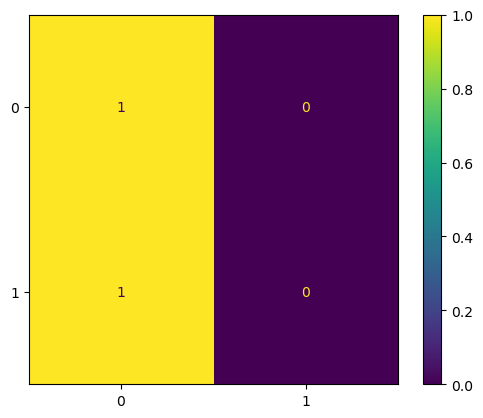

In [9]:
class_names = [1, 2, 3, 4, 5]
disp = plot_confusion_matrix(clf_svm, X_test_scaled, V_test, values_format ="d", display_labels=class_names)
disp.ax_.set_title("Confusion Matrix Valence")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

In [10]:
X_test_scaled

array([[ 0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.],
       [ 0., -1., -1.,  0., -1., -1., -1., -1.,  0.]])

In [ ]:
filename = 'SVM_Valence_model_job.sav'
joblib.dump(clf_svm, filename)

# Sen för Arousal

In [ ]:
X_train, X_test, A_train, A_test = train_test_split(X_encoded, A)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
# X_train_scaled = X_train
# X_test_scaled = X_test


clf_svm = SVC(random_state=42, decision_function_shape='ovr')
clf_svm.fit(X_train_scaled, A_train)

In [ ]:
X_train_scaled

In [ ]:
X_test_scaled

In [ ]:
class_names = [1, 2, 3, 4, 5]
disp = plot_confusion_matrix(clf_svm, X_test_scaled, A_test, values_format ="d", display_labels=class_names)
disp.ax_.set_title("Confusion Matrix Arousal")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

In [ ]:
import joblib
filename = 'SVM_Arousal_model_job.sav'
joblib.dump(clf_svm, filename)

In [ ]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test_scaled, A_test)
result